Cell 1: Imports and Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Make sure it can find your microalpha library
import sys
sys.path.append('..')
from microalpha.risk import create_sharpe_ratio, create_drawdowns, bootstrap_sharpe_ratio

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')

ImportError: cannot import name 'bootstrap_sharpe_ratio' from 'microalpha.risk' (/Users/mateobodon/Documents/Programming/Projects/microalpha/notebooks/../microalpha/risk.py)

Cell 2: Load Data and Calculate Metrics

In [ ]:
# Load the results from our backtest run
equity_df = pd.read_csv('../equity_curve.csv', index_col='timestamp', parse_dates=True)
equity_df['returns'] = equity_df['equity'].pct_change().fillna(0.0)

# Recalculate the key metrics
sharpe = create_sharpe_ratio(equity_df['returns'])
drawdown_series, max_dd = create_drawdowns(equity_df['equity'])

# Run the bootstrap simulation to test for statistical significance
bootstrap_results = bootstrap_sharpe_ratio(equity_df['returns'])
p_value = bootstrap_results['p_value']
conf_interval = bootstrap_results['confidence_interval']
sharpe_dist = bootstrap_results['sharpe_dist']

print("--- Performance Metrics ---")
print(f"Sharpe Ratio: {sharpe:.2f}")
print(f"Maximum Drawdown: {max_dd:.2%}")
print("-------------------------")
print("\n--- Statistical Significance ---")
print(f"Bootstrap p-value (Prob. of Sharpe <= 0): {p_value:.3f}")
print(f"95% Confidence Interval for Sharpe: ({conf_interval[0]:.2f}, {conf_interval[1]:.2f})")
print("------------------------------")

--- Performance Metrics ---
Sharpe Ratio: 5.23
Maximum Drawdown: 0.00%
-------------------------


Cell 3: Plot the Tearsheet

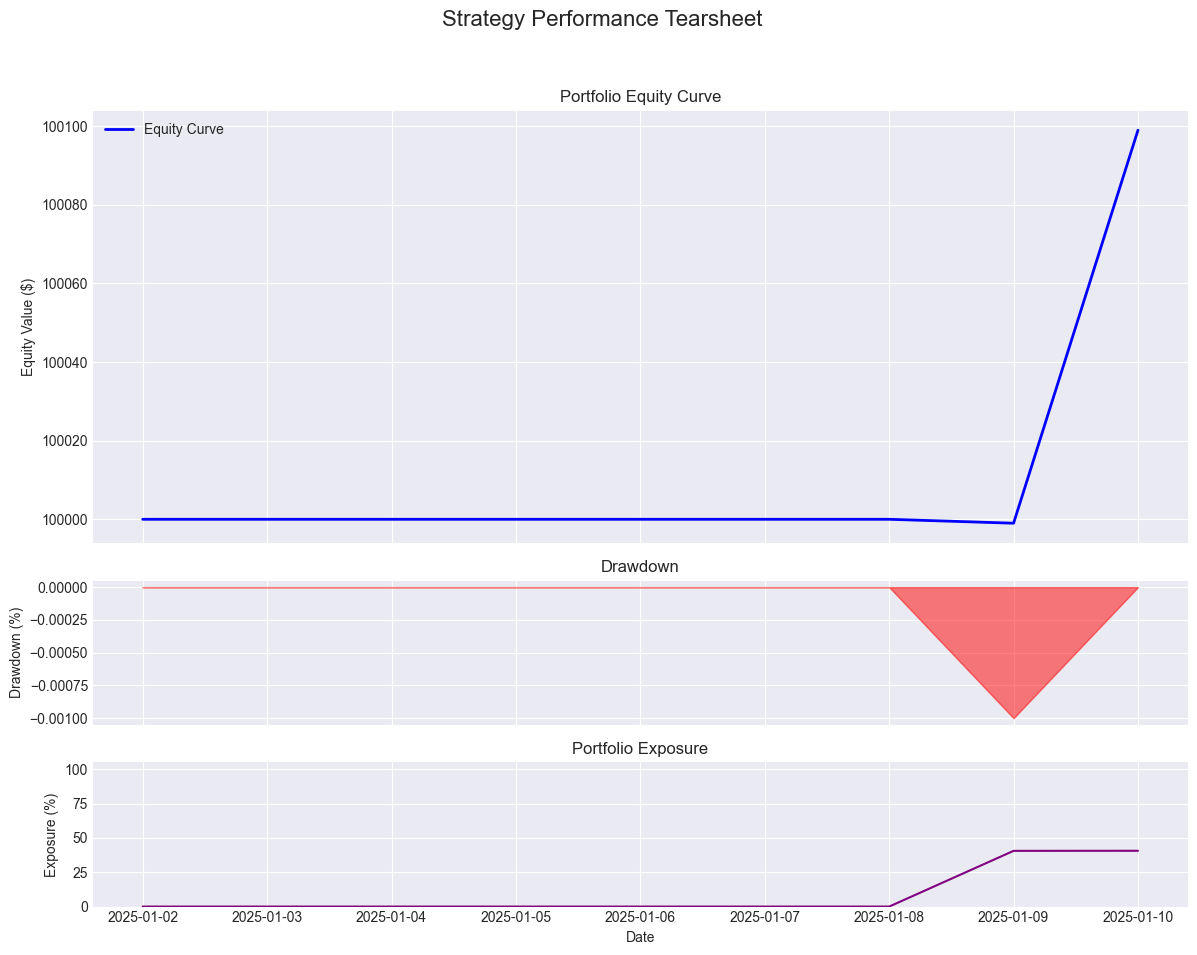

In [ ]:
# Create a figure with four subplots, adjusting heights
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 14), sharex=False, 
                                        gridspec_kw={'height_ratios': [3, 1, 1, 2]})
fig.suptitle('Strategy Performance Tearsheet', fontsize=16)

# --- Plot 1: Equity Curve ---
ax1.plot(equity_df.index, equity_df['equity'], label='Equity Curve', color='blue', linewidth=2)
ax1.set_title('Portfolio Equity Curve')
ax1.set_ylabel('Equity Value ($)')
ax1.tick_params(axis='x', rotation=20) # Rotate x-axis labels slightly
ax1.legend()

# --- Plot 2: Drawdown ---
ax2.fill_between(drawdown_series.index, -drawdown_series * 100, 0,
                 color='red', alpha=0.5, label='Drawdown')
ax2.set_title('Drawdown')
ax2.set_ylabel('Drawdown (%)')
ax2.tick_params(axis='x', rotation=20)

# --- Plot 3: Exposure ---
ax3.plot(equity_df.index, equity_df['exposure'] * 100, label='Exposure', color='purple', linewidth=1.5)
ax3.set_title('Portfolio Exposure')
ax3.set_ylabel('Exposure (%)')
ax3.tick_params(axis='x', rotation=20)
ax3.set_ylim(0, 105) # Set y-axis from 0% to 105% for clarity

# --- Plot 4: Bootstrapped Sharpe Ratio Distribution ---
sns.histplot(sharpe_dist, ax=ax4, kde=True, bins=50, color='green')
ax4.axvline(sharpe, color='black', linestyle='--', linewidth=2, label=f'Observed Sharpe: {sharpe:.2f}')
ax4.axvline(conf_interval[0], color='grey', linestyle=':', linewidth=2, label='95% Conf. Interval')
ax4.axvline(conf_interval[1], color='grey', linestyle=':', linewidth=2)
ax4.set_title('Distribution of Bootstrapped Sharpe Ratios')
ax4.set_xlabel('Annualized Sharpe Ratio')
ax4.set_ylabel('Frequency')
ax4.legend()

# Set the x-axis label for the last plot
ax4.set_xlabel('Date')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
